# US_Citizens_Model_Testing

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (10, 6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)
#pd.options.display.float_format = '{:.3f}'.format

In [2]:
df = pd.read_csv('adult_dummy.csv')

In [3]:
df.head()

,age,fnlwgt,capital_gain,capital_loss,hours_per_week,salary,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,occupation_Transport-moving,race_Asian-Pac-Islander,race_Black,race_Other,race_White,gender_Male,education_summary_low_level_grade,education_summary_medium_level_grade,marital_status_summary_single,native_country_summary_US
0,39,77516,2174,0,40,0,0,0,0,0,...,0,0,0,0,1,1,0,0,1,1
1,50,83311,0,0,13,0,0,0,0,1,...,0,0,0,0,1,1,0,0,0,1
2,38,215646,0,0,40,0,0,1,0,0,...,0,0,0,0,1,1,0,1,1,1
3,53,234721,0,0,40,0,0,1,0,0,...,0,0,1,0,0,1,1,0,0,1
4,28,338409,0,0,40,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29954 entries, 0 to 29953
Data columns (total 34 columns):
 #   Column                                Non-Null Count  Dtype
---  ------                                --------------  -----
 0   age                                   29954 non-null  int64
 1   fnlwgt                                29954 non-null  int64
 2   capital_gain                          29954 non-null  int64
 3   capital_loss                          29954 non-null  int64
 4   hours_per_week                        29954 non-null  int64
 5   salary                                29954 non-null  int64
 6   workclass_Local-gov                   29954 non-null  int64
 7   workclass_Private                     29954 non-null  int64
 8   workclass_Self-emp-inc                29954 non-null  int64
 9   workclass_Self-emp-not-inc            29954 non-null  int64
 10  workclass_State-gov                   29954 non-null  int64
 11  workclass_Without-pay                 299

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,29954.000,38.252,12.853,17.000,28.000,37.000,47.000,80.000
fnlwgt,29954.000,190174.993,105529.144,13769.000,117987.500,178818.000,237447.000,1484705.000
capital_gain,29954.000,1093.042,7424.905,0.000,0.000,0.000,0.000,99999.000
capital_loss,29954.000,88.420,403.588,0.000,0.000,0.000,0.000,3900.000
hours_per_week,29954.000,40.472,10.446,7.000,40.000,40.000,45.000,70.000
salary,29954.000,0.249,0.432,0.000,0.000,0.000,0.000,1.000
workclass_Local-gov,29954.000,0.068,0.253,0.000,0.000,0.000,0.000,1.000
workclass_Private,29954.000,0.743,0.437,0.000,0.000,1.000,1.000,1.000
workclass_Self-emp-inc,29954.000,0.035,0.184,0.000,0.000,0.000,0.000,1.000
workclass_Self-emp-not-inc,29954.000,0.079,0.269,0.000,0.000,0.000,0.000,1.000


In [6]:
df['salary'].value_counts()

0    22505
1     7449
Name: salary, dtype: int64

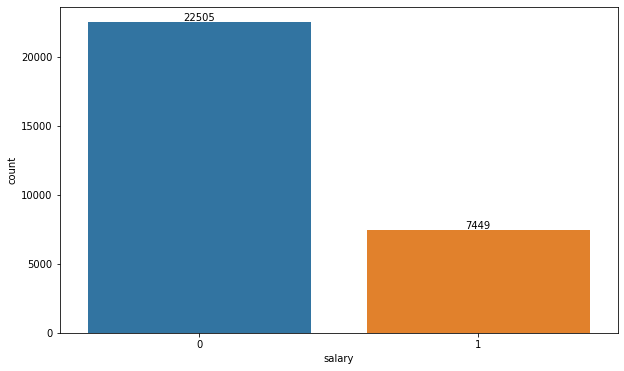

In [7]:
ax = sns.countplot(df['salary'])
ax.bar_label(ax.containers[0]);

## Train | Test Split

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, r2_score
from sklearn.model_selection import cross_val_score, cross_validate

In [9]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [10]:
X = df.drop('salary', axis=1)
y = df['salary']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y, random_state=101)

In [12]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
pd.DataFrame(X_train_scaled)

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,0.291,0.199,-0.147,-0.218,0.432,-0.272,0.587,-0.192,-0.292,-0.210,...,-0.233,-0.181,-0.326,-0.089,0.411,0.692,-0.376,-1.285,0.955,0.341
1,-1.419,-0.193,-0.147,-0.218,-2.918,-0.272,0.587,-0.192,-0.292,-0.210,...,-0.233,-0.181,-0.326,-0.089,0.411,-1.445,-0.376,0.778,0.955,0.341
2,-1.341,1.506,-0.147,-0.218,-2.439,-0.272,0.587,-0.192,-0.292,-0.210,...,-0.233,-0.181,-0.326,-0.089,0.411,-1.445,-0.376,0.778,0.955,0.341
3,0.213,-0.258,-0.147,-0.218,-0.047,-0.272,0.587,-0.192,-0.292,-0.210,...,-0.233,-0.181,-0.326,-0.089,0.411,-1.445,-0.376,0.778,0.955,0.341
4,0.913,-0.069,13.414,-0.218,-0.047,-0.272,0.587,-0.192,-0.292,-0.210,...,-0.233,-0.181,-0.326,-0.089,0.411,0.692,-0.376,0.778,-1.047,0.341
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26953,1.535,-0.378,1.763,-0.218,-0.047,-0.272,0.587,-0.192,-0.292,-0.210,...,-0.233,-0.181,-0.326,-0.089,0.411,-1.445,-0.376,-1.285,0.955,0.341
26954,1.068,-1.005,-0.147,-0.218,-0.812,-0.272,0.587,-0.192,-0.292,-0.210,...,-0.233,-0.181,-0.326,-0.089,0.411,0.692,-0.376,0.778,0.955,0.341
26955,1.146,0.960,-0.147,-0.218,-0.047,-0.272,0.587,-0.192,-0.292,-0.210,...,-0.233,-0.181,-0.326,-0.089,0.411,0.692,-0.376,0.778,-1.047,0.341
26956,0.447,-0.090,-0.147,-0.218,0.910,-0.272,0.587,-0.192,-0.292,-0.210,...,-0.233,-0.181,-0.326,-0.089,0.411,0.692,-0.376,-1.285,-1.047,-2.931


In [14]:
pd.DataFrame(X_test_scaled)

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,-0.564,0.328,-0.147,-0.218,0.432,-0.272,0.587,-0.192,-0.292,-0.210,...,4.295,-0.181,-0.326,-0.089,0.411,0.692,-0.376,0.778,0.955,0.341
1,1.690,-0.424,-0.147,-0.218,0.719,-0.272,0.587,-0.192,-0.292,-0.210,...,-0.233,-0.181,-0.326,-0.089,0.411,-1.445,-0.376,0.778,0.955,0.341
2,-0.486,0.616,-0.147,-0.218,1.867,-0.272,0.587,-0.192,-0.292,-0.210,...,-0.233,-0.181,-0.326,-0.089,0.411,0.692,-0.376,-1.285,-1.047,0.341
3,1.068,0.049,-0.147,-0.218,0.432,-0.272,0.587,-0.192,-0.292,-0.210,...,-0.233,-0.181,-0.326,-0.089,0.411,-1.445,-0.376,0.778,0.955,0.341
4,-0.952,-0.402,-0.147,-0.218,-0.047,-0.272,0.587,-0.192,-0.292,-0.210,...,-0.233,-0.181,-0.326,-0.089,0.411,-1.445,2.660,-1.285,0.955,0.341
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2991,-1.030,-0.073,-0.147,-0.218,0.432,-0.272,-1.703,5.212,-0.292,-0.210,...,-0.233,-0.181,-0.326,-0.089,0.411,0.692,-0.376,-1.285,0.955,0.341
2992,-1.108,0.284,-0.147,-0.218,-0.047,-0.272,0.587,-0.192,-0.292,-0.210,...,-0.233,-0.181,-0.326,-0.089,0.411,0.692,-0.376,0.778,0.955,0.341
2993,-1.497,-0.739,-0.147,-0.218,1.676,-0.272,0.587,-0.192,-0.292,-0.210,...,-0.233,-0.181,-0.326,-0.089,0.411,0.692,-0.376,0.778,-1.047,0.341
2994,0.758,-0.051,-0.147,3.947,1.388,-0.272,0.587,-0.192,-0.292,-0.210,...,4.295,-0.181,-0.326,-0.089,0.411,0.692,2.660,-1.285,-1.047,0.341


# 1- Logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
log_model=LogisticRegression()
log_model.fit(X_train_scaled, y_train)

y_pred=log_model.predict(X_test_scaled)
y_pred_proba = log_model.predict_proba(X_test_scaled)

log_f1 = f1_score(y_test, y_pred)
log_recall = recall_score(y_test, y_pred)
log_accuracy = accuracy_score(y_test, y_pred)
log_r2 = r2_score(y_test, y_pred)
log_auc = roc_auc_score(y_test, y_pred_proba[:, 1])

eval_metric(log_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[2096  155]
 [ 298  447]]
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      2251
           1       0.74      0.60      0.66       745

    accuracy                           0.85      2996
   macro avg       0.81      0.77      0.78      2996
weighted avg       0.84      0.85      0.84      2996


Train_Set
[[18817  1437]
 [ 2689  4015]]
              precision    recall  f1-score   support

           0       0.87      0.93      0.90     20254
           1       0.74      0.60      0.66      6704

    accuracy                           0.85     26958
   macro avg       0.81      0.76      0.78     26958
weighted avg       0.84      0.85      0.84     26958



# 2- K-Nearest Neighbors (KNN)

In [17]:
from sklearn.neighbors import KNeighborsClassifier

In [18]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_scaled, y_train)

y_pred = knn_model.predict(X_test_scaled)
y_pred_proba = knn_model.predict_proba(X_test_scaled)

knn_f1 = f1_score(y_test, y_pred)
knn_recall = recall_score(y_test, y_pred)
knn_accuracy = accuracy_score(y_test, y_pred)
knn_r2 = r2_score(y_test, y_pred)
knn_auc = roc_auc_score(y_test, y_pred_proba[:, 1])

eval_metric(knn_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[2032  219]
 [ 307  438]]
              precision    recall  f1-score   support

           0       0.87      0.90      0.89      2251
           1       0.67      0.59      0.62       745

    accuracy                           0.82      2996
   macro avg       0.77      0.75      0.76      2996
weighted avg       0.82      0.82      0.82      2996


Train_Set
[[18972  1282]
 [ 2105  4599]]
              precision    recall  f1-score   support

           0       0.90      0.94      0.92     20254
           1       0.78      0.69      0.73      6704

    accuracy                           0.87     26958
   macro avg       0.84      0.81      0.82     26958
weighted avg       0.87      0.87      0.87     26958



# 3- SVM

In [19]:
from sklearn.svm import SVC

In [20]:
svm_model = SVC(probability=True)
svm_model.fit(X_train_scaled, y_train)

y_pred = svm_model.predict(X_test_scaled)
y_pred_proba = svm_model.predict_proba(X_test_scaled)

svc_f1 = f1_score(y_test, y_pred)
svc_recall = recall_score(y_test, y_pred)
svc_accuracy = accuracy_score(y_test, y_pred)
svc_r2 = r2_score(y_test, y_pred)
svc_auc = roc_auc_score(y_test, y_pred_proba[:, 1])

eval_metric(svm_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[2105  146]
 [ 294  451]]
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      2251
           1       0.76      0.61      0.67       745

    accuracy                           0.85      2996
   macro avg       0.82      0.77      0.79      2996
weighted avg       0.85      0.85      0.85      2996


Train_Set
[[18978  1276]
 [ 2566  4138]]
              precision    recall  f1-score   support

           0       0.88      0.94      0.91     20254
           1       0.76      0.62      0.68      6704

    accuracy                           0.86     26958
   macro avg       0.82      0.78      0.80     26958
weighted avg       0.85      0.86      0.85     26958



# 4- AdaBoostClassifier

In [21]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_val_score, cross_validate

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [23]:
ada_model = AdaBoostClassifier(n_estimators=50, random_state=101)
ada_model.fit(X_train, y_train)

y_pred = ada_model.predict(X_test)
y_pred_proba = ada_model.predict_proba(X_test)

ada_f1 = f1_score(y_test, y_pred)
ada_recall = recall_score(y_test, y_pred)
ada_accuracy = accuracy_score(y_test, y_pred)
ada_r2 = r2_score(y_test, y_pred)
ada_auc = roc_auc_score(y_test, y_pred_proba[:, 1])
 
eval_metric(ada_model, X_train, y_train, X_test, y_test)

Test_Set
[[2096  162]
 [ 250  488]]
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      2258
           1       0.75      0.66      0.70       738

    accuracy                           0.86      2996
   macro avg       0.82      0.79      0.81      2996
weighted avg       0.86      0.86      0.86      2996


Train_Set
[[18856  1391]
 [ 2478  4233]]
              precision    recall  f1-score   support

           0       0.88      0.93      0.91     20247
           1       0.75      0.63      0.69      6711

    accuracy                           0.86     26958
   macro avg       0.82      0.78      0.80     26958
weighted avg       0.85      0.86      0.85     26958



# 5- Gradient Boosting

In [24]:
from sklearn.ensemble import GradientBoostingClassifier

In [25]:
grad_model = GradientBoostingClassifier(random_state=101)
grad_model.fit(X_train, y_train)

y_pred = grad_model.predict(X_test)
y_pred_proba = grad_model.predict_proba(X_test)

gb_f1 = f1_score(y_test, y_pred)
gb_recall = recall_score(y_test, y_pred)
gb_accuracy = accuracy_score(y_test, y_pred)
gb_r2 = r2_score(y_test, y_pred)
gb_auc = roc_auc_score(y_test, y_pred_proba[:,1])

eval_metric(grad_model, X_train, y_train, X_test, y_test)

Test_Set
[[2146  112]
 [ 288  450]]
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      2258
           1       0.80      0.61      0.69       738

    accuracy                           0.87      2996
   macro avg       0.84      0.78      0.80      2996
weighted avg       0.86      0.87      0.86      2996


Train_Set
[[19257   990]
 [ 2674  4037]]
              precision    recall  f1-score   support

           0       0.88      0.95      0.91     20247
           1       0.80      0.60      0.69      6711

    accuracy                           0.86     26958
   macro avg       0.84      0.78      0.80     26958
weighted avg       0.86      0.86      0.86     26958



# 6- XG Boosting

In [26]:
from xgboost import XGBClassifier

In [27]:
xgb = XGBClassifier(random_state=42).fit(X_train, y_train)

y_pred = xgb.predict(X_test)
y_pred_proba = xgb.predict_proba(X_test)

xgb_f1 = f1_score(y_test, y_pred)
xgb_recall = recall_score(y_test, y_pred)
xgb_accuracy = accuracy_score(y_test, y_pred)
xgb_r2 = r2_score(y_test, y_pred)
xgb_auc = roc_auc_score(y_test, y_pred_proba[:, 1])

eval_metric(xgb, X_train, y_train, X_test, y_test)

Test_Set
[[2118  140]
 [ 252  486]]
              precision    recall  f1-score   support

           0       0.89      0.94      0.92      2258
           1       0.78      0.66      0.71       738

    accuracy                           0.87      2996
   macro avg       0.84      0.80      0.81      2996
weighted avg       0.86      0.87      0.87      2996


Train_Set
[[19375   872]
 [ 1809  4902]]
              precision    recall  f1-score   support

           0       0.91      0.96      0.94     20247
           1       0.85      0.73      0.79      6711

    accuracy                           0.90     26958
   macro avg       0.88      0.84      0.86     26958
weighted avg       0.90      0.90      0.90     26958



# 7- Random Forest

In [28]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
rf_model = RandomForestClassifier(random_state=101)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
y_pred_proba = rf_model.predict_proba(X_test)

rf_f1 = f1_score(y_test, y_pred)
rf_recall = recall_score(y_test, y_pred)
rf_accuracy = accuracy_score(y_test, y_pred)
rf_r2 = r2_score(y_test, y_pred)
rf_auc = roc_auc_score(y_test, y_pred_proba[:, 1])

eval_metric(rf_model, X_train, y_train, X_test, y_test)

Test_Set
[[2089  169]
 [ 263  475]]
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      2258
           1       0.74      0.64      0.69       738

    accuracy                           0.86      2996
   macro avg       0.81      0.78      0.80      2996
weighted avg       0.85      0.86      0.85      2996


Train_Set
[[20246     1]
 [    7  6704]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20247
           1       1.00      1.00      1.00      6711

    accuracy                           1.00     26958
   macro avg       1.00      1.00      1.00     26958
weighted avg       1.00      1.00      1.00     26958



# 8- Decision Tree Classifier

In [30]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=101)
dt_model.fit(X_train, y_train)

y_pred = dt_model.predict(X_test)
y_pred_proba = dt_model.predict_proba(X_test)

dt_f1 = f1_score(y_test, y_pred)
dt_recall = recall_score(y_test, y_pred)
dt_accuracy = accuracy_score(y_test, y_pred)
dt_r2 = r2_score(y_test, y_pred)
dt_auc = roc_auc_score(y_test, y_pred_proba[:,1])

eval_metric(dt_model, X_train, y_train, X_test, y_test)

Test_Set
[[1986  272]
 [ 269  469]]
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      2258
           1       0.63      0.64      0.63       738

    accuracy                           0.82      2996
   macro avg       0.76      0.76      0.76      2996
weighted avg       0.82      0.82      0.82      2996


Train_Set
[[20247     0]
 [    5  6706]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20247
           1       1.00      1.00      1.00      6711

    accuracy                           1.00     26958
   macro avg       1.00      1.00      1.00     26958
weighted avg       1.00      1.00      1.00     26958



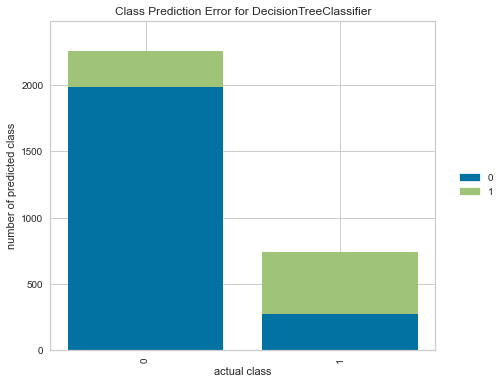

In [31]:
from yellowbrick.classifier import ClassPredictionError

visualizer = ClassPredictionError(dt_model)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.poof();

# 9- LightGBM (Light Gradient Boosting Machine) Classifier

In [32]:
from lightgbm import LGBMClassifier

lgbm_model = LGBMClassifier(random_state=101)
lgbm_model.fit(X_train, y_train)

y_pred = lgbm_model.predict(X_test)
y_pred_proba = lgbm_model.predict_proba(X_test)

lgbm_f1 = f1_score(y_test, y_pred)
lgbm_recall = recall_score(y_test, y_pred)
lgbm_accuracy = accuracy_score(y_test, y_pred)
lgbm_r2 = r2_score(y_test, y_pred)
lgbm_auc = roc_auc_score(y_test, y_pred_proba[:,1])

eval_metric(lgbm_model, X_train, y_train, X_test, y_test)

Test_Set
[[2125  133]
 [ 240  498]]
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      2258
           1       0.79      0.67      0.73       738

    accuracy                           0.88      2996
   macro avg       0.84      0.81      0.82      2996
weighted avg       0.87      0.88      0.87      2996


Train_Set
[[19204  1043]
 [ 2160  4551]]
              precision    recall  f1-score   support

           0       0.90      0.95      0.92     20247
           1       0.81      0.68      0.74      6711

    accuracy                           0.88     26958
   macro avg       0.86      0.81      0.83     26958
weighted avg       0.88      0.88      0.88     26958



# Comparing Models

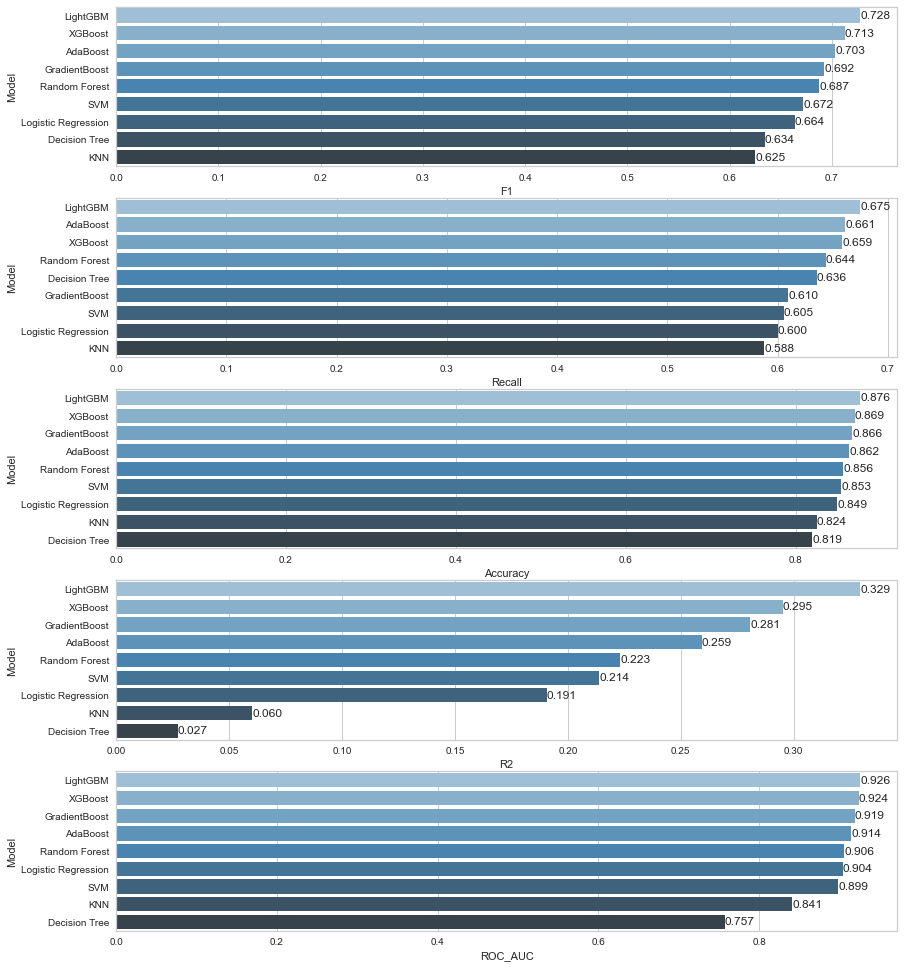

In [38]:
compare = pd.DataFrame({"Model": ["Logistic Regression", "KNN", "SVM", "Decision Tree", "Random Forest", "AdaBoost",
                                 "GradientBoost", "XGBoost", "LightGBM"],
                        "F1": [log_f1, knn_f1, svc_f1, dt_f1, rf_f1, ada_f1, gb_f1, xgb_f1, lgbm_f1],
                        "Recall": [log_recall, knn_recall, svc_recall, dt_recall, rf_recall, ada_recall, gb_recall, 
                                   xgb_recall, lgbm_recall],
                        "Accuracy": [log_accuracy, knn_accuracy, svc_accuracy, dt_accuracy, rf_accuracy, ada_accuracy, 
                                     gb_accuracy, xgb_accuracy, lgbm_accuracy],
                        "R2": [log_r2, knn_r2, svc_r2, dt_r2, rf_r2, ada_r2, gb_r2, xgb_r2, lgbm_r2],                        
                        "ROC_AUC": [log_auc, knn_auc, svc_auc, dt_auc, rf_auc, ada_auc, gb_auc, xgb_auc, lgbm_auc]})

def labels(ax):
    ax.bar_label(ax.containers[0], fmt="%.3f")
    
plt.figure(figsize=(14, 17))
plt.subplot(511)
compare = compare.sort_values(by="F1", ascending=False)
ax=sns.barplot(x="F1", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(512)
compare = compare.sort_values(by="Recall", ascending=False)
ax=sns.barplot(x="Recall", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(513)
compare = compare.sort_values(by="Accuracy", ascending=False)
ax=sns.barplot(x="Accuracy", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(514)
compare = compare.sort_values(by="R2", ascending=False)
ax=sns.barplot(x="R2", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(515)
compare = compare.sort_values(by="ROC_AUC", ascending=False)
ax=sns.barplot(x="ROC_AUC", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.show()

# Finding The Best Modelling with Pycaret

In [34]:
from pycaret.classification import *

s = setup(data=df, target='salary', session_id=123)

,Description,Value
0,session_id,123
1,Target,salary
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(29954, 34)"
5,Missing Values,False
6,Numeric Features,5
7,Categorical Features,28
8,Ordinal Features,False
9,High Cardinality Features,False


In [35]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8632,0.9216,0.6371,0.7710,0.6973,0.6100,0.6149,0.2190
xgboost,Extreme Gradient Boosting,0.8615,0.9194,0.6421,0.7613,0.6964,0.6076,0.6115,2.0450
gbc,Gradient Boosting Classifier,0.8612,0.9163,0.5914,0.7958,0.6782,0.5921,0.6030,0.9990
ada,Ada Boost Classifier,0.8534,0.9084,0.6092,0.7518,0.6726,0.5796,0.5851,0.3840
rf,Random Forest Classifier,0.8468,0.8976,0.6136,0.7256,0.6647,0.5663,0.5698,0.8900
lda,Linear Discriminant Analysis,0.8327,0.8858,0.5562,0.7057,0.6219,0.5165,0.5226,0.1260
ridge,Ridge Classifier,0.8325,0.0000,0.5055,0.7348,0.5989,0.4976,0.5115,0.0540
et,Extra Trees Classifier,0.8294,0.8761,0.6059,0.6725,0.6374,0.5262,0.5275,0.9440
dt,Decision Tree Classifier,0.8053,0.7460,0.6286,0.6024,0.6151,0.4849,0.4851,0.1150
lr,Logistic Regression,0.7901,0.5807,0.2631,0.7024,0.3825,0.2864,0.3368,0.8100
